In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras

In [2]:
# Importing the dataset
df = pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
#tokenizing the data
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['comment_text'])
sequences = tokenizer.texts_to_sequences(df['comment_text'])

In [4]:
#padding the data
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
maxlen = 100
data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)

In [5]:
#splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df.iloc[:,2:], test_size=0.2, random_state=0)

In [6]:
#building the model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 6)                 4806      
                                                                 
Total params: 84,806
Trainable params: 84,806
Non-trainable params: 0
_________________________________________________________________


In [7]:
#training the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
3192/3192 [==============================] - 10s 3ms/step - loss: 0.0967 - acc: 0.9820 - val_loss: 0.0805 - val_acc: 0.8745
Epoch 2/5
3192/3192 [==============================] - 8s 3ms/step - loss: 0.0760 - acc: 0.9026 - val_loss: 0.0807 - val_acc: 0.8250
Epoch 3/5
3192/3192 [==============================] - 8s 3ms/step - loss: 0.0737 - acc: 0.7922 - val_loss: 0.0794 - val_acc: 0.9239
Epoch 4/5
3192/3192 [==============================] - 8s 2ms/step - loss: 0.0725 - acc: 0.7619 - val_loss: 0.0805 - val_acc: 0.6439
Epoch 5/5
3192/3192 [==============================] - 7s 2ms/step - loss: 0.0711 - acc: 0.7816 - val_loss: 0.0806 - val_acc: 0.6293


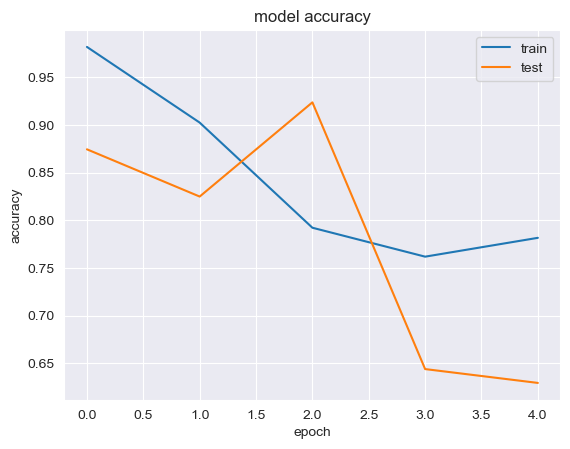

In [8]:
#plotting the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

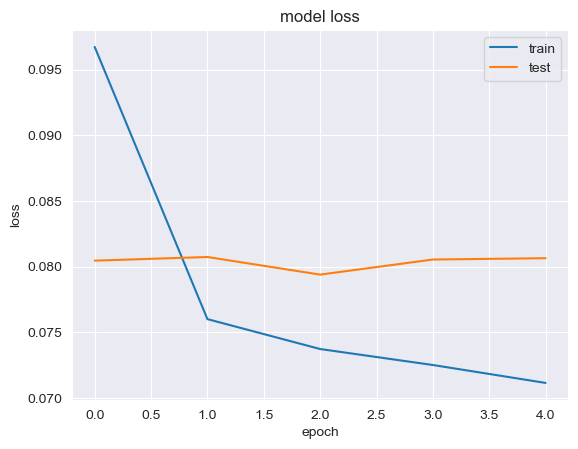

In [9]:
#plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [10]:
#evaluating the model
model.evaluate(X_test, y_test)

998/998 [==============================] - 2s 2ms/step - loss: 0.0790 - acc: 0.6320


[0.07897450029850006, 0.6319912075996399]

In [11]:
#predicting the model
model.predict(X_test)

998/998 [==============================] - 1s 1ms/step


array([[4.3066675e-03, 5.9090974e-04, 1.0514491e-03, 4.3921740e-04,
        8.3977479e-04, 2.9320398e-04],
       [3.8837440e-02, 1.5337131e-02, 3.9847542e-02, 3.9246366e-03,
        1.6786065e-02, 6.2621860e-03],
       [1.2015494e-02, 1.7365729e-03, 1.7243548e-03, 1.0186795e-03,
        1.2541709e-03, 4.8126286e-04],
       ...,
       [1.2410164e-04, 6.1627780e-04, 5.2115669e-05, 1.7215287e-03,
        8.7630346e-05, 2.8723478e-04],
       [3.7111048e-02, 1.9423980e-02, 1.1713946e-02, 6.9324379e-03,
        1.5093419e-02, 2.7718288e-03],
       [2.3675711e-04, 1.3606747e-04, 4.9985749e-05, 2.5033185e-04,
        5.6909867e-05, 4.5611760e-05]], dtype=float32)

In [12]:
#tokenizing the test data
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [13]:
test_sequences = tokenizer.texts_to_sequences(test['comment_text'])
test_data = tf.keras.utils.pad_sequences(test_sequences, maxlen=maxlen)

In [14]:
#predicting the test data
test_pred = model.predict(test_data)

4787/4787 [==============================] - 6s 1ms/step
